In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Non-Linear Equations
Non-Linear Equations are equations that appear as curved line when are plotted. We want to solve a non-linear equation by finding the roots of the equation (Find $\alpha \in R$ such that $f(\alpha) = 0 $)

In [21]:
x = sym.symbols('x')

f_sym = x / 8 * (63*x**4 - 70*x**2 + 15) # Legendre Polynomial of Order 5
f_prime_sym = sym.diff(f_sym, x)

f = sym.lambdify(x, f_sym, 'numpy')
f_prime = sym.lambdify(x, f_prime_sym, 'numpy')

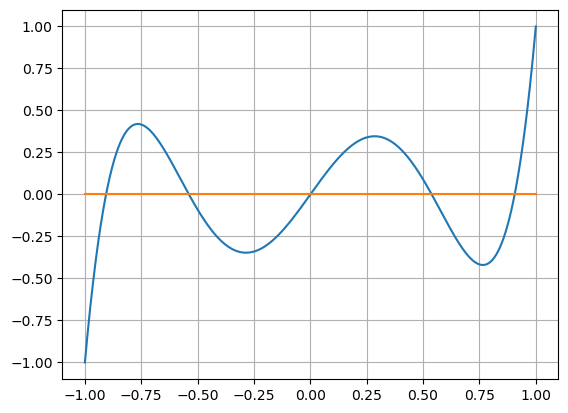

In [22]:
# Visualize the non-linear equation
n = 1000
x = np.linspace(-1, 1, n)

plt.plot(x, f(x))
plt.plot(x, np.zeros_like(x))
plt.grid()

In [23]:
# Define the interval [a, b]. In this case we want to find the last root which is in the interval [0.75, 1]
a = 0.75
b = 1

### Bisection
Given a continuous function $f$, we want to find the point $\alpha$ such that $f(\alpha) = 0$. The general idea is to build a sequence $(x^0,x^1,...,x^k)$ such that $$\lim_{k\to\infty} x^k = \alpha$$
We need some assumption to use this method:
- $f(a, b) \rightarrow R$
- $a < b \newline \newline$ 

If $f(a) * f(b) < 0$ exists at least one root $\alpha$

Found at iteration 31 the f(0) value in the interval [0.75, 1]: 0.9061798459733836


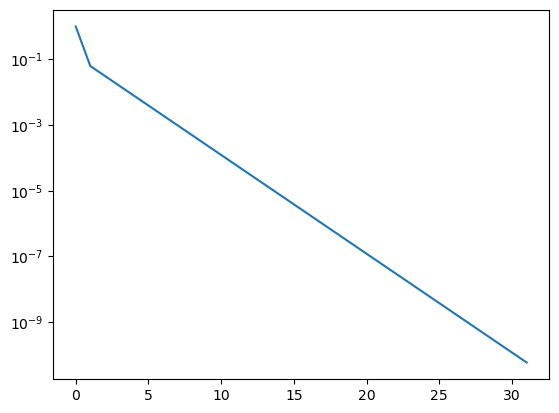

In [5]:
def bisection(f, a, b, eps = 1e-10, max_iterations = 1000):
	assert f(a) * f(b) < 0, f'The interval [{a}, {b}] does not contain a root'

	c = np.mean([a, b])

	err = eps + 1
	errors = [err]
	
	i = 0
	while (err > eps and i < max_iterations):
		if (f(a) * f(c) < 0):
			b = c
		else:
			a = c
		
		c_new = np.mean([a, b])
		
		err = abs(c - c_new)
		errors.append(err)
		
		c = c_new
		i += 1

	return c, errors, i
	
alpha, errors, i = bisection(f, a, b)

print(f'Found at iteration {i} the f(0) value in the interval [{a}, {b}]: {alpha}')
plt.semilogy(errors)

With this method is possible to estimate the number of iteration for a certain value of the tollerace. Basically at the iteration $k$ we can compute the size of the interval which will be equal to $\frac{|b - a|}{2^k}$. We required that this size is less than the tollerance $\epsilon$. 
$$\frac{|b - a|}{2^k} < \epsilon \Rightarrow k > log_2 \frac{|b - a|}{\epsilon} = \frac{log|b - a| - log \epsilon}{log2}$$

In [7]:
iteration = (np.log(np.abs(b - a)) - np.log(1e-10)) / np.log(2)
print(f'Estimeted number of iterations: {iteration}')

Estimeted number of iterations: 31.219280948873624


### Newton's Method
In this method we approximate the behaviour of the function with the linear approximation. We write around the root the taylor series expansion truncated to the first order term.
$$f(x^{k+1}) = f(x^k) + f'(x^k)(x-x^k)$$
From the first order taylor expansion we can derive the newton's formula
$$x^{k + 1} = x^k - \frac{f(x^k)}{f'(x^k)}, k=0,1,2,...$$
In general this method is part of a family of interaction method (Chrod, Secant) in general this method depends on the definition of the denominator. We can generalize in this way for the Newton's method since in the denominatoriwe have the first order derivative.
$$q^k=f'(x^k)$$
$$x^{k + 1} = x^k - \frac{f(x^k)}{q^k}, k=0,1,2,...$$


Found at iteration 5 the f(0) value in the interval [0.75, 1]: 0.906179845938664


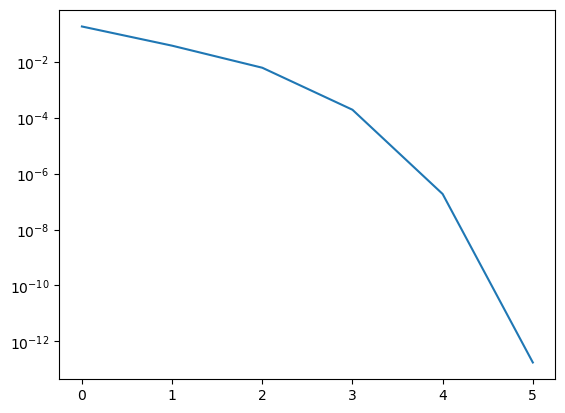

In [17]:
def newton(f, f_prime, a, b, eps = 1e-10, max_iterations = 1000):
	
	c = np.mean([a, b])
	
	err = np.abs(f(c))
	errors = [err]
	i = 0
	while (err > eps and i < max_iterations):
		qk = f_prime(c)
		if np.abs(qk) < 1e-12:
			raise RuntimeError(f"f'({c}) is closed to zero")
		c_new = c - (f(c) / qk)

		err = np.abs(c - c_new)
		errors.append(err)

		c = c_new
		i += 1

	return c, errors, i

alpha, errors, i = newton(f, f_prime, a, b)

print(f'Found at iteration {i} the f(0) value in the interval [{a}, {b}]: {alpha}')
plt.semilogy(errors)

### Chrod Method
In the Chrod Method the approximation of the denominator assume another value. In general we have another evaluation of the derivative (not updated).

$$q^k = q =\frac{f(b) - f(a)}{b - a}$$
$$x^{k+1} = x^k-\frac{f(x^k)}{q}$$

Found at iteration 13 the f(0) value in the interval [0.75, 1]: 0.9061798459469729


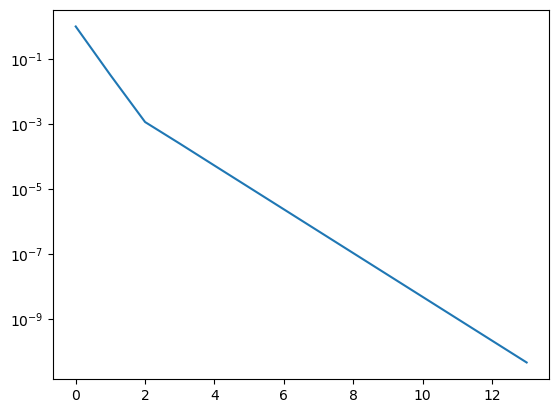

In [19]:
def chrod(f, a, b, eps = 1e-10, max_iterations = 1000):
	
	c = np.mean([a, b])
	q = (f(b) - f(a)) / (b - a)

	err = eps + 1
	errors = [err]

	i = 0

	while (err > eps and i < max_iterations):
		c_new = c - f(c) / q

		err = np.abs(c - c_new)
		errors.append(err)

		c = c_new
		i += 1

	return c, errors, i

alpha, errors, i = chrod(f, a, b)
print(f'Found at iteration {i} the f(0) value in the interval [{a}, {b}]: {alpha}')
plt.semilogy(errors)

### Secant Method
$$q^k = \frac{f(x^k) - f(x^{k - 1})}{x^k - x^{k - 1}}$$
$$x^{k+1} = x^k - \frac{f(x^k)}{q^k}$$

Found at iteration 7 the f(0) value in the interval [0.75, 1]: 0.906179845938664


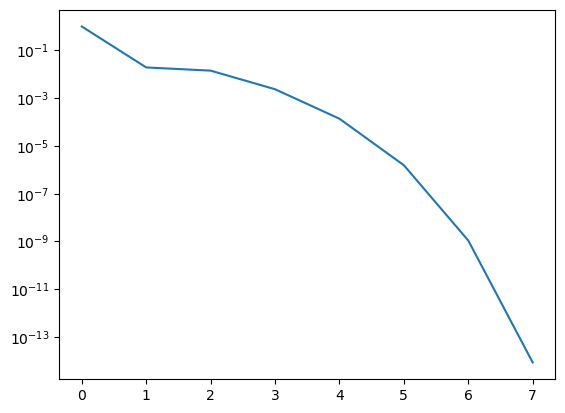

In [22]:
def secant(f, a, b, eps = 1e-10, max_iterations = 1000):

	c = np.mean([a, b])
	c_old = b

	err = eps + 1
	errors = [err]

	i = 0

	while (err > eps and i < max_iterations):
		qk = (f(c) - f(c_old)) / (c - c_old)
		c_new = c - f(c) / qk

		err = np.abs(c - c_new)
		errors.append(err)

		c_old = c
		c = c_new
		i += 1

	return c, errors, i

alpha, errors, i = secant(f, a, b)
print(f'Found at iteration {i} the f(0) value in the interval [{a}, {b}]: {alpha}')
plt.semilogy(errors)

### Fixed Points Iterations

Given a function $f$, the root of $f$ can be found as follows by rewriting $f(x) = 0$:
$$f(x) = 0 \Rightarrow x - \phi (x) = 0$$
$$x^{k+1} = \phi (x^k)$$
We still consider the polynomial above $f = \frac{t}{8} (63t^4-70t^2+15)$ but to find the roots of this polynomial we can also consider only the polynomial inside the parenthesis $f_1 = 63t^4-70t^2+15$. <br><br> Now we want to recast $f_1(t)$ in the form $t - \phi(t)$. We have different possibility:
- divide by $70t$: $\frac{63}{70}t^3 - t + \frac{15}{70t} = 0 \Rightarrow t = \phi_1 = \frac{63}{70}t^3 + \frac{15}{70t}$
- divide by $63t^3$: $t - \frac{70}{63t} + \frac{15}{63t^3} = 0 \Rightarrow t = \phi_2 = \frac{70}{63t} - \frac{15}{63t^3}$
- multiply by $\frac{t}{15}$: $\frac{63}{15}t^5 - \frac{70}{15}t^3 + t = 0 \Rightarrow t = \phi_3 = - \frac{63}{15}t^5 + \frac{70}{15}t^3$
- rearrange: $70t^2 = 63t^4 + 15 \Rightarrow t = \sqrt{\frac{63t^4 + 15}{70}}$


In [31]:
x = sym.symbols('x')

phi_sym = sym.sqrt((63*x**4 + 15) / 70)
phi_prime_sym = sym.diff(phi_sym, x)

phi = sym.lambdify(x, phi_sym, 'numpy')
phi_prime = sym.lambdify(x, phi_prime_sym, 'numpy') # The derivative should be less than 1 to converge

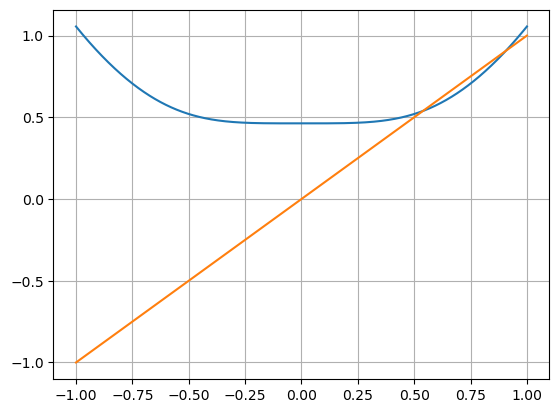

In [32]:
n = 1000
x = np.linspace(-1, 1, n)

plt.plot(x, phi(x))
plt.plot(x, x)
plt.grid()

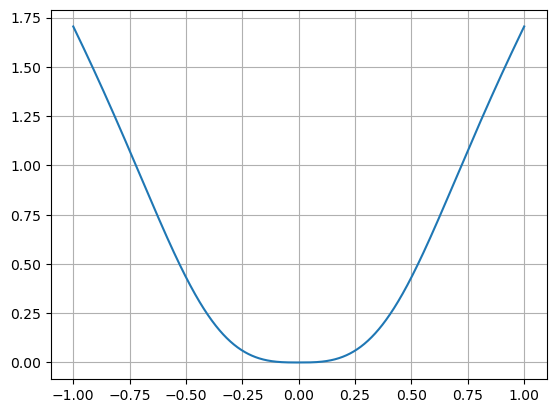

In [34]:
plt.plot(x, np.abs(phi_prime(x)))
plt.grid()

Found at iteration 32 the f(0) value in the interval [-0.7, 0.7]: 0.538469310010453


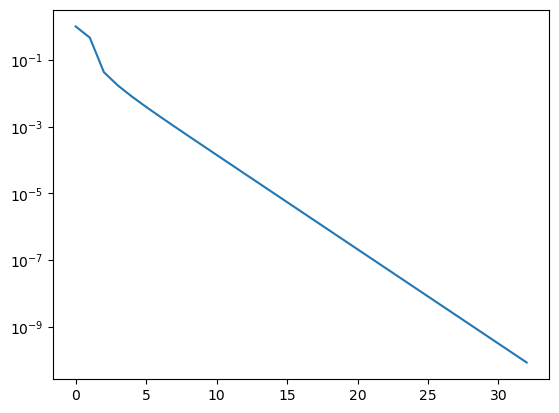

In [35]:
def fixed_point(phi, x0, eps = 1e-10, max_iterations = 1000):
	
	c = x0
	err = 1 + eps
	errors = [err]

	i = 0
	while (err > eps and i < max_iterations):
		c_new = phi(c)

		err = np.abs(c - c_new)
		errors.append(err)

		c = c_new
		i += 1

	return c, errors, i


alpha, errors, i = fixed_point(phi, np.mean([-0.7, 0.7]))

print(f'Found at iteration {i} the f(0) value in the interval [{-0.7}, {0.7}]: {alpha}')
plt.semilogy(errors)